## Project 1 - Part 3: Data Analysis  
**Name:** Alexandra Lawler  
**Date:** October 19, 2025  
**Course:** Data Science Programming  

### Purpose  
This notebook analyzes the cleaned "MajorsFall24" dataset to uncover trends related to demographics, influences, and outreach for computing programs at County College of Morris (CCM).  
The findings will help guide the CCM IT Department's recruiting and communication strategies.

### Research Questions  
1. What is the demographic makeup of computing majors at CCM?  
2. What is the age distribution among computing majors?  
3. Which computing degree programs have the highest enrollment at CCM?  
4. How do demographic factors (gender and age) vary across the top computing degree programs?

## Import Libraries and Load the Cleaned Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the cleaned dataset file
df = pd.read_csv("majors_survey_cleaned.csv")

In [3]:
# Quick overview of cleaned dataset file
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 5 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   timestamp                                          197 non-null    object
 1   what_degree_program_are_you_currently_enrolled_in  197 non-null    object
 2   gender_simple                                      197 non-null    object
 3   race_simple                                        197 non-null    object
 4   age                                                197 non-null    object
dtypes: object(5)
memory usage: 7.8+ KB


,timestamp,what_degree_program_are_you_currently_enrolled_in,gender_simple,race_simple,age
0,2024/09/09 12:33:58 PM AST,Mechanical Engineering Technologies,man,white,21-24
1,2024/09/09 6:00:11 PM AST,CIS Game Development Option,man,multi_racial,18 and younger
2,2024/09/10 9:00:12 AM AST,Computer Science,man,multi_racial,18 and younger
3,2024/09/10 12:34:53 PM AST,Mechanical Engineering,man,hispanic_latino,19-20
4,2024/09/10 3:06:47 PM AST,Computer Science,man,asian,19-20


## Question 1: What is the demographic makeup of computing majors?

### Gender Demographic makeup of computing majors

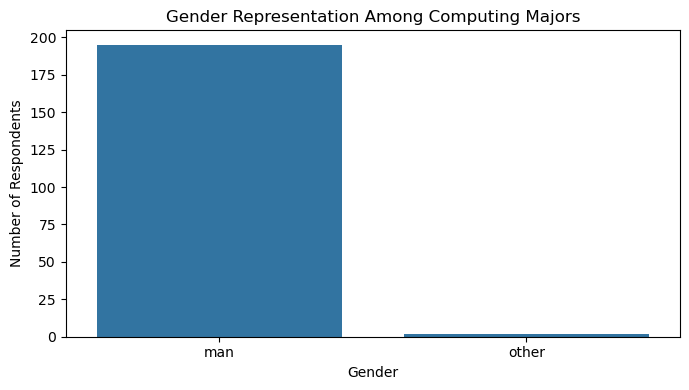

In [5]:
plt.figure(figsize=(7,4))
sns.countplot(x="gender_simple", data=df)
plt.title("Gender Representation Among Computing Majors")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

### Race Demographic makeup of computing majors

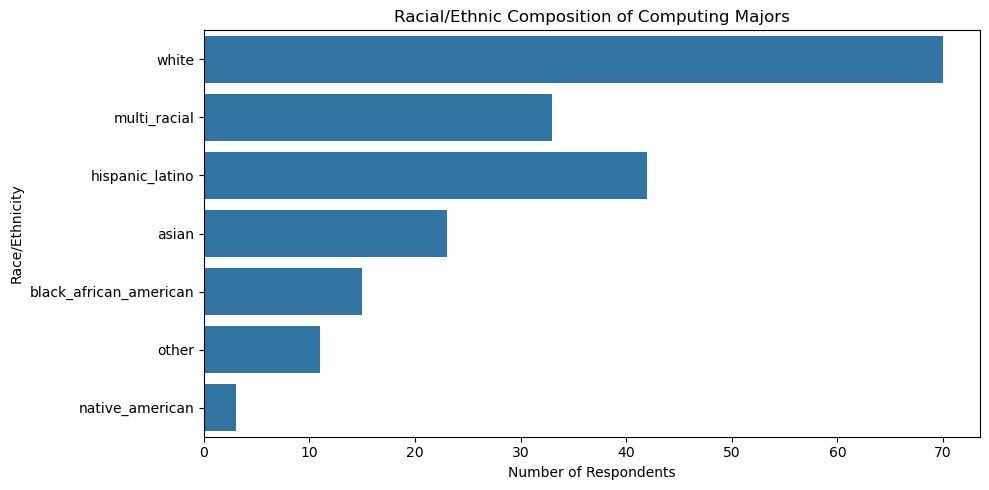

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y="race_simple", data=df)
plt.title("Racial/Ethnic Composition of Computing Majors")
plt.xlabel("Number of Respondents")
plt.ylabel("Race/Ethnicity")
plt.tight_layout()
plt.show()

**Explanation:**
These charts illustrate the demographic makeup of CCM computing majors by gender and race. 

## Question 2: What is the age distribution among computing majors? 

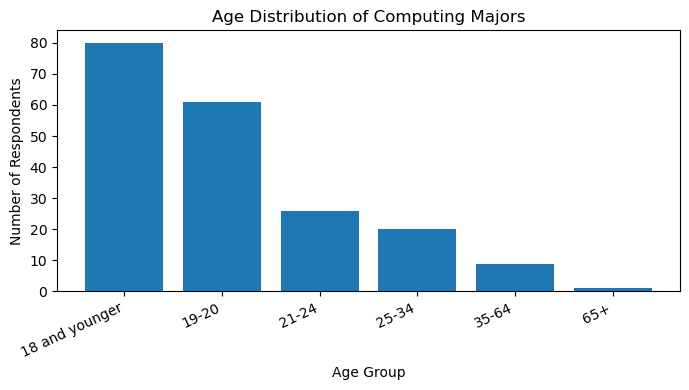

In [12]:
age_counts = df["age"].value_counts()

plt.figure(figsize=(7,4))
plt.bar(age_counts.index, age_counts.values)
plt.title("Age Distribution of Computing Majors")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

***Explanation***
This chart shows the age distribution among students enrolled in computing majors.

### Question 3: 3. Which computing degree programs have the highest enrollment at CCM? 

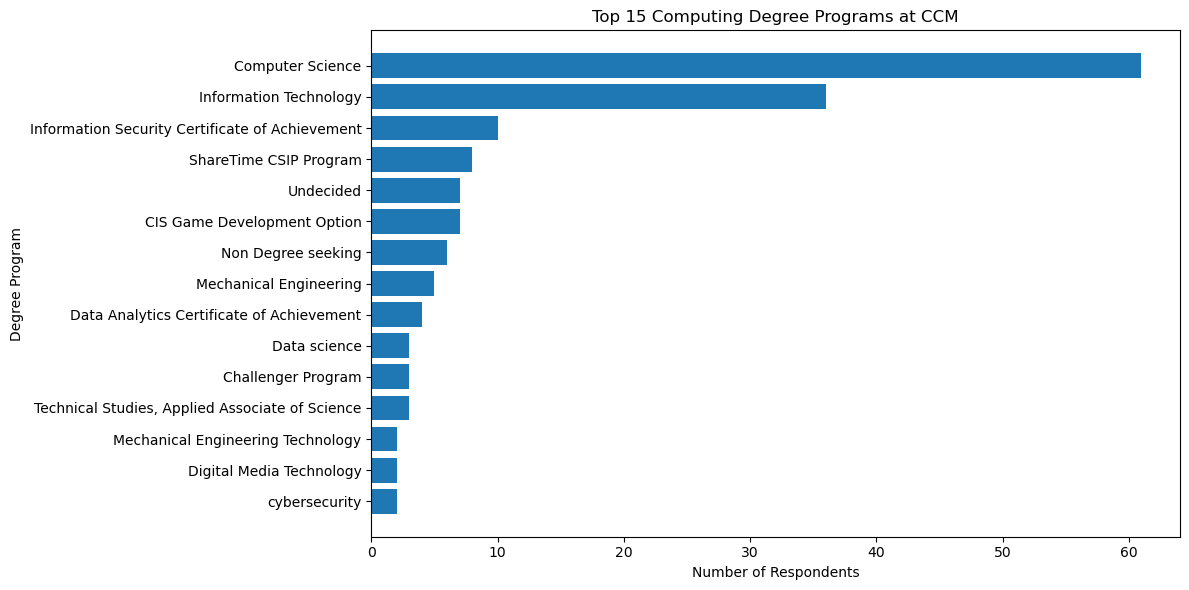

In [13]:
program_counts = df["what_degree_program_are_you_currently_enrolled_in"].value_counts().head(15)

plt.figure(figsize=(12,6))
plt.barh(program_counts.index[::-1], program_counts.values[::-1])
plt.title("Top 15 Computing Degree Programs at CCM")
plt.xlabel("Number of Respondents")
plt.ylabel("Degree Program")
plt.tight_layout()
plt.show()

***Explanation***
This plot identifies the most popular computing degree programs among survey respondents.  

### Question 4: How do demographic factors (gender and age) vary across the top computing degree programs?

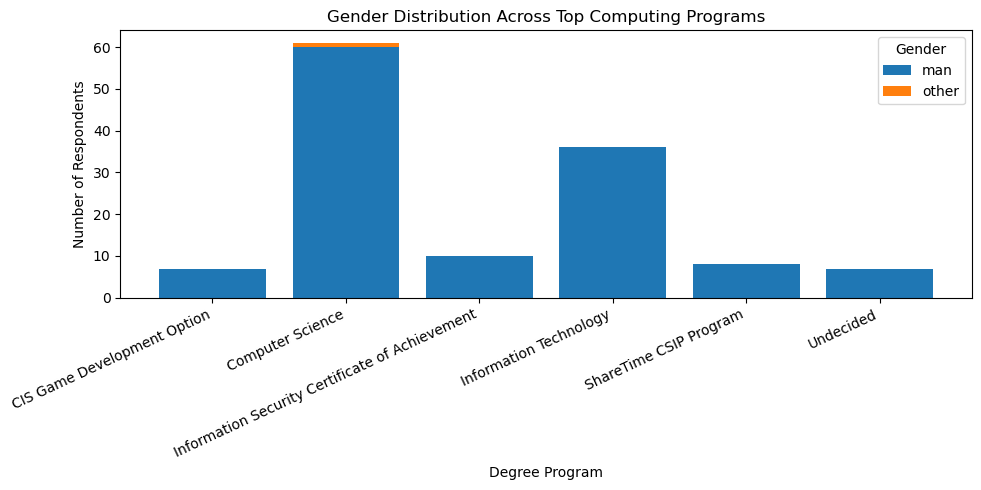

In [14]:
# Focus on top 6 programs
top_programs = df["what_degree_program_are_you_currently_enrolled_in"].value_counts().head(6).index
subset = df[df["what_degree_program_are_you_currently_enrolled_in"].isin(top_programs)]

# gender vs program
cross_gender = pd.crosstab(subset["what_degree_program_are_you_currently_enrolled_in"], subset["gender_simple"])

# Stacked bar plot
plt.figure(figsize=(10,5))
bottom = None
for col in cross_gender.columns:
    vals = cross_gender[col].values
    if bottom is None:
        plt.bar(cross_gender.index, vals, label=col)
        bottom = vals
    else:
        plt.bar(cross_gender.index, vals, bottom=bottom, label=col)
        bottom += vals

plt.title("Gender Distribution Across Top Computing Programs")
plt.xlabel("Degree Program")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=25, ha="right")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

***Explanation***
This stacked bar chart compares gender representation across the six most popular computing programs.

## Conclusion

### This analysis of the "MajorsFall24" survey dataset shows clear trends in demographics and enrollment among computing majors at CCM.

- Most respondents fall within the traditional college age range (18 and younger, 19-20)
- One gender group is more represented (men), suggesting the potential oppurtunities for increased diversity within the gender demographic.
- Certain degree programs are significantly more popular, indicating strong student interest in those areas (Computer Science)

### Recommendations
- Continue outreach to younger students while creating the flexible options for adult learners.
- Highlight programs with lower enrollment through targeted marketing.
- Promote inclusive and diverse participation across all computing fields. 